## [Project Euler](https://projecteuler.net/) Answers

**Multiples of 3 and 5**

_Problem 1_

If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23.

Find the sum of all the multiples of 3 or 5 below 1000.

In [87]:
sum([n for n in range(1000) if n % 3 == 0 or n % 5 == 0])

233168

**Even Fibonacci numbers**

_Problem 2_

Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with 1 and 2, the first 10 terms will be:

1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.

In [102]:
def fib(n):
    i=0
    a,b = 1,2
    fib_ = []
    while i < n:
        fib_.append(a)
        a,b = b, a+b
        i+=1
    return fib_
        
sum([n for n in fib(50) if n % 2 == 0 and n < 4000000])

4613732

**Largest prime factor**

_Problem 3_

The prime factors of 13195 are 5, 7, 13 and 29.

What is the largest prime factor of the number 600851475143 ?

In [3]:
def largest_prime_factor(n):
    def factors(n):
        return set(reduce(list.__add__, ([i, n//i] for i in range(1, int(n**0.5) + 1) if n % i == 0)))
    
    def is_prime(n_):
        if n_ % 2 == 0 and n_ > 2: 
            return False
        return all(n_ % i for i in range(3, int(n_**0.5) + 1, 2))
    
    prime_factors = [n for n in factors(n) if is_prime(n)]
    return max(prime_factors)

print largest_prime_factor(600851475143)    

6857


**Largest palindrome product**

_Problem 4_

A palindromic number reads the same both ways. The largest palindrome made from the product of two 2-digit numbers is 9009 = 91 × 99.

Find the largest palindrome made from the product of two 3-digit numbers.

In [60]:
is_palindrome = lambda num: True if str(num) == str(num)[::-1] else False

def three_digit_prods(min=100, max=999):
    for a in range(min,max + 1):
        for b in range(a + 1, max + 1):
            yield a*b

max_pal = 0
for x in three_digit_prods():
    if is_palindrome(x) and x > max_pal:
        max_pal = x
        
print max_pal

# 906609

906609


**Smallest multiple**

_Problem 5_

2520 is the smallest number that can be divided by each of the numbers from 1 to 10 without any remainder.

What is the smallest positive number that is evenly divisible by all of the numbers from 1 to 20?

In [69]:
not_found = True
start_num = 1

while not_found:
    if all([True if start_num % num == 0 else False for num in xrange(1,21)]):
        not_found = False
        print start_num
    else:
        start_num +=1
    
# 232792560

232792560


**Sum square difference**

_Problem 6_

The sum of the squares of the first ten natural numbers is,

12 + 22 + ... + 102 = 385

The square of the sum of the first ten natural numbers is,

(1 + 2 + ... + 10)2 = 552 = 3025

Hence the difference between the sum of the squares of the first ten natural numbers and the square of the sum is 3025 − 385 = 2640.

Find the difference between the sum of the squares of the first one hundred natural numbers and the square of the sum.

In [27]:
import time

sum_square_difference = lambda first_n_numbers: sum(range(1,first_n_numbers+1))**2 -\
                                                sum([x**2 for x in range(1, first_n_numbers+1)])
t0 = time.time()
print sum_square_difference(100)
print time.time() - t0

25164150
0.000136137008667


**10001st prime**

_Problem 7_

By listing the first six prime numbers: 2, 3, 5, 7, 11, and 13, we can see that the 6th prime is 13.

What is the 10 001st prime number?

In [62]:
def nth_prime_number(n):
    assert(n > 0 and float(n) % 1 == 0), "n must be positive integer."

    def is_prime(n_):
        if n_ % 2 == 0 and n_ > 2: 
            return False
        return all(n_ % i for i in range(3, int(n_**0.5) + 1, 2))
    
    primes = []
    i=2
    
    while len(primes) < n:
        if is_prime(i):
            primes.append(i)
            i+=1
        else:
            i+=1
    return primes

    
print nth_prime_number(10001)[-1]  # prints last prime number returned

104743


**Largest product in a series**

_Problem 8_

The four adjacent digits in the 1000-digit number that have the greatest product are 9 × 9 × 8 × 9 = 5832.

73167176531330624919225119674426574742355349194934
96983520312774506326239578318016984801869478851843
85861560789112949495459501737958331952853208805511
12540698747158523863050715693290963295227443043557
66896648950445244523161731856403098711121722383113
62229893423380308135336276614282806444486645238749
30358907296290491560440772390713810515859307960866
70172427121883998797908792274921901699720888093776
65727333001053367881220235421809751254540594752243
52584907711670556013604839586446706324415722155397
53697817977846174064955149290862569321978468622482
83972241375657056057490261407972968652414535100474
82166370484403199890008895243450658541227588666881
16427171479924442928230863465674813919123162824586
17866458359124566529476545682848912883142607690042
24219022671055626321111109370544217506941658960408
07198403850962455444362981230987879927244284909188
84580156166097919133875499200524063689912560717606
05886116467109405077541002256983155200055935729725
71636269561882670428252483600823257530420752963450

Find the thirteen adjacent digits in the 1000-digit number that have the greatest product. What is the value of this product?

In [23]:
long_series = list(open("./project_euler_problem8.txt").read())
long_series = [int(x) for x in long_series]

max_product=0
i=0

while len(long_series[i:i+13]) == 13:
    product_ = reduce(lambda x,y: x*y, long_series[i:i+13])
    if product_ > max_product:
        max_product = product_
        i+=1
    else:
        i+=1

print max_product

23514624000


(array([      0.,  100000.,  200000.,  300000.,  400000.,  500000.,
         600000.,  700000.]), <a list of 8 Text xticklabel objects>)

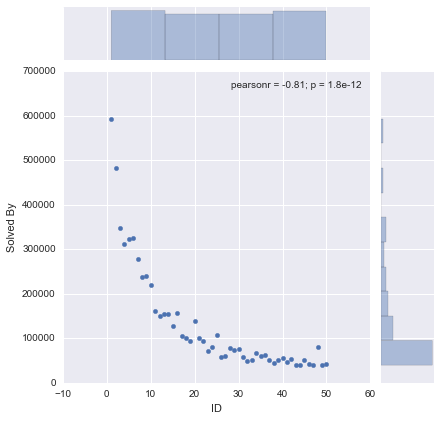

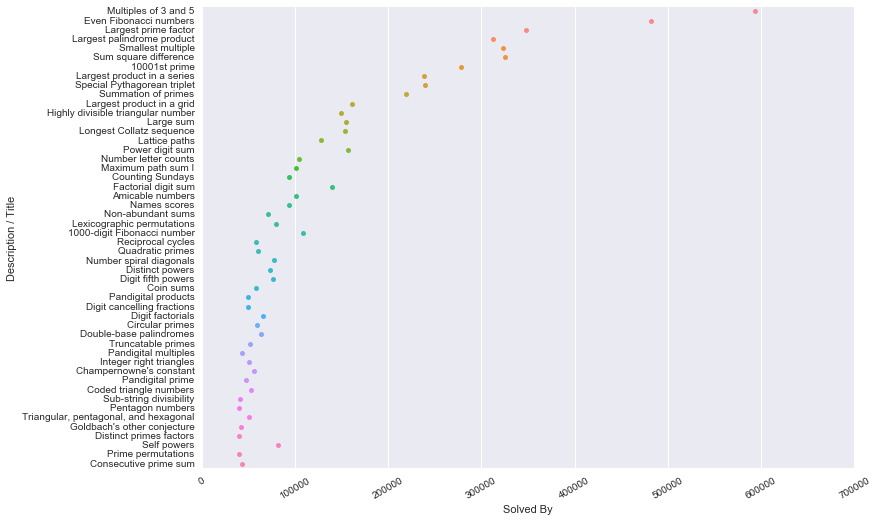

In [4]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("project_euler_archive.csv")
df.dropna(subset=["Description / Title"], how="all", inplace=True)


sns.jointplot("ID", "Solved By", data=df)

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(y="Description / Title", x="Solved By", data=df, ax=ax)
plt.xticks(rotation=30)

**Special Pythagorean triplet**

_Problem 9_

A Pythagorean triplet is a set of three natural numbers, a < b < c, for which,

a2 + b2 = c2

For example, 32 + 42 = 9 + 16 = 25 = 52.

There exists exactly one Pythagorean triplet for which a + b + c = 1000.

Find the product abc.

In [68]:
is_triple = lambda a,b,c: a**2 + b**2 == c**2

for a in range(1,1000):
    for b in range(a, 1000-a):
        for c in range(b, 1000-b):
            if a+b+c == 1000 and is_triple(a,b,c):
                print a,b,c, a*b*c

200 375 425 31875000


**Summation of primes**

_Problem 10_

The sum of the primes below 10 is 2 + 3 + 5 + 7 = 17.

Find the sum of all the primes below two million.

In [76]:
def is_prime(n_):  # borrowed from my problem 7 answer
        if n_ % 2 == 0 and n_ > 2: 
            return False
        return all(n_ % i for i in range(3, int(n_**0.5) + 1, 2))
    
sum([n for n in xrange(2, 2000000) if is_prime(n)])

142913828922

**Largest product in a grid**

_Problem 11_

In the 20×20 grid below, four numbers along a diagonal line have been marked in red.

```08 02 22 97 38 15 00 40 00 75 04 05 07 78 52 12 50 77 91 08
49 49 99 40 17 81 18 57 60 87 17 40 98 43 69 48 04 56 62 00
81 49 31 73 55 79 14 29 93 71 40 67 53 88 30 03 49 13 36 65
52 70 95 23 04 60 11 42 69 24 68 56 01 32 56 71 37 02 36 91
22 31 16 71 51 67 63 89 41 92 36 54 22 40 40 28 66 33 13 80
24 47 32 60 99 03 45 02 44 75 33 53 78 36 84 20 35 17 12 50
32 98 81 28 64 23 67 10 26 38 40 67 59 54 70 66 18 38 64 70
67 26 20 68 02 62 12 20 95 63 94 39 63 08 40 91 66 49 94 21
24 55 58 05 66 73 99 26 97 17 78 78 96 83 14 88 34 89 63 72
21 36 23 09 75 00 76 44 20 45 35 14 00 61 33 97 34 31 33 95
78 17 53 28 22 75 31 67 15 94 03 80 04 62 16 14 09 53 56 92
16 39 05 42 96 35 31 47 55 58 88 24 00 17 54 24 36 29 85 57
86 56 00 48 35 71 89 07 05 44 44 37 44 60 21 58 51 54 17 58
19 80 81 68 05 94 47 69 28 73 92 13 86 52 17 77 04 89 55 40
04 52 08 83 97 35 99 16 07 97 57 32 16 26 26 79 33 27 98 66
88 36 68 87 57 62 20 72 03 46 33 67 46 55 12 32 63 93 53 69
04 42 16 73 38 25 39 11 24 94 72 18 08 46 29 32 40 62 76 36
20 69 36 41 72 30 23 88 34 62 99 69 82 67 59 85 74 04 36 16
20 73 35 29 78 31 90 01 74 31 49 71 48 86 81 16 23 57 05 54
01 70 54 71 83 51 54 69 16 92 33 48 61 43 52 01 89 19 67 48```

The product of these numbers is 26 × 63 × 78 × 14 = 1788696.

What is the greatest product of four adjacent numbers in the same direction (up, down, left, right, or diagonally) in the 20×20 grid?

In [83]:
# not shown: preprocessed grid into a list of lists and pickled it to a local file
import pickle
grid = pickle.load(open("project_euler_problem11.p"))

def check_adjacent(grid):
    max_product = 0
    for row in grid:
        i = 0
        while len(row[i:i+4]) == 4:
            row_ = row[i:i+4]
            product_ = reduce(lambda x,y: x*y, row_)
            if product_ > max_product:
                max_product = product_
            i+=1
    return max_product

def transpose(grid):
    new_grid = []
    for col in range(len(grid[0])):
        new_grid.append([grid[row][col] for row in range(len(grid))])
    return new_grid

def diags(grid):
    diags = []
    for y in range(len(grid[0])):
        diag = []
        for x in range(len(grid[0])):
            try:
                diag.append(grid[x][x+y])
            except IndexError:
                continue
        diags.append(diag)
    return diags


def diags2(grid):
    diags = []
    for y in range(len(grid[0])):
        diag = []
        for x in range(len(grid[0])):
            try:
                diag.append(grid[x+y][x])
            except IndexError:
                continue
        diags.append(diag)
    return diags



# print check_adjacent(diags2(grid))
# print check_adjacent(diags(grid))
# print check_adjacent(transpose(grid))
# print check_adjacent(grid)
# >>> 40,304,286
# >>> 32,565,456
# >>> 51,267,216
# >>> 48,477,312

**Highly divisible triangular number**

_Problem 12_

The sequence of triangle numbers is generated by adding the natural numbers. So the 7th triangle number would be 1 + 2 + 3 + 4 + 5 + 6 + 7 = 28. The first ten terms would be:

1, 3, 6, 10, 15, 21, 28, 36, 45, 55, ...

Let us list the factors of the first seven triangle numbers:

```
 1: 1
 3: 1,3
 6: 1,2,3,6
10: 1,2,5,10
15: 1,3,5,15
21: 1,3,7,21
28: 1,2,4,7,14,28```
We can see that 28 is the first triangle number to have over five divisors.

What is the value of the first triangle number to have over five hundred divisors?

In [10]:
nth_triangle_number = lambda n: n*(n+1)/2.0

def factors(n):    
    return set(reduce(list.__add__, ([i, n//i] for i in range(1, int(n**0.5) + 1) if n % i == 0)))

not_solved = True
tri_n = 1
while not_solved:
    if len(factors(nth_triangle_number(tri_n))) > 500:
        not_solved = False
        print nth_triangle_number(tri_n)
    else:
        tri_n +=1


76576500.0


**Large sum**

_Problem 13_

Work out the first ten digits of the sum of the following one-hundred 50-digit numbers.

```37107287533902102798797998220837590246510135740250
46376937677490009712648124896970078050417018260538
74324986199524741059474233309513058123726617309629
91942213363574161572522430563301811072406154908250
23067588207539346171171980310421047513778063246676
89261670696623633820136378418383684178734361726757
28112879812849979408065481931592621691275889832738
...
72107838435069186155435662884062257473692284509516
20849603980134001723930671666823555245252804609722
53503534226472524250874054075591789781264330331690```

In [26]:
import pickle

nums = pickle.load(open("./project_euler_problem13.p", "rb")) # not shown, pickle list of long types into file
nums_sum = reduce(lambda x,y: x+y, nums) # built in reduce function
print str(nums_sum)[:10] # print first 10 digits of number (from left to right)

5537376230


**Longest Collatz sequence**

_Problem 1_

The following iterative sequence is defined for the set of positive integers:

```n → n/2 (n is even)
n → 3n + 1 (n is odd)```

Using the rule above and starting with 13, we generate the following sequence:

```13 → 40 → 20 → 10 → 5 → 16 → 8 → 4 → 2 → 1```

It can be seen that this sequence (starting at 13 and finishing at 1) contains 10 terms. Although it has not been proved yet (Collatz Problem), it is thought that all starting numbers finish at 1.

Which starting number, under one million, produces the longest chain?

NOTE: Once the chain starts the terms are allowed to go above one million.

In [21]:
def collatz(n):
    if n % 2 == 0 and n != 1:
        o = n/2
        return [o] + collatz(o)
    elif n % 2 != 0 and n != 1:
        o = 3*n+1
        return [o] + collatz(o)
    return [n][:-1]

longest_num = 0
longest_seq = 0
t0 = time.time()
for num in xrange(1,1000000):
    cl = len(collatz(num))
    if cl > longest_seq:
        longest_seq = cl
        longest_num = num
print longest_num

837799
